# Levantamiento de información
- Darek Aljuri Martinez
- Valentina Ruiz Torres
- Santiago Soler Prado
### Objetivo del taller:
El objetivo del taller es analizar la relación entre el rendimiento académico de los estudiantes y el área de la universidad donde suelen pasar más tiempo. Para lograr esto, se recolectaron datos mediante encuestas y se construyó un modelo de regresión lineal múltiple que permitiera evaluar qué factores influyen en el promedio académico. Además, se buscó comprender cómo la selección de variables y la evaluación del sobreajuste afectan la interpretación y precisión del modelo.

## Fase 1: Recolección de Datos
### Pregunta de Investigación
La pregunta de investigación que abordaremos es:
"¿Cómo influye el área donde un estudiante pasa más tiempo en la universidad en su rendimiento académico?"

### Fuente de los Datos
Para responder esta pregunta, se diseñó una encuesta en google forms en la que los estudiantes reportaron información sobre:

- Edad
- Facultad
- Semestre
- Área donde pasan más tiempo en la universidad
- Horas promedio en dicha área
- Frecuencia de estudio
- Promedio académico
- Horas de estudio a la semana
- Modalidad de estudio (solo o en grupo)
- Lugar de estudio fuera de clase
- Si recibe beca
- Si trabaja
- Si participa en actividades extracurriculares

### Criterios de Calidad de los Datos
- Se recolectaron más de 50 observaciones.
- Se incluyeron tanto variables numéricas como categóricas.
- Se validó la consistencia y limpieza de los datos.

### Carga y Exploración de los Datos
A continuación, se carga el dataset y se realiza una exploración inicial de los datos, y se limpian estos.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv(r"C:\Users\soler\Downloads\Formulario sin título (respuestas) - Respuestas de formulario 1.csv")

# Renombrar columnas para facilitar su manejo
df.columns = ['timestamp', 'edad', 'facultad', 'semestre', 'area_tiempo_libre', 'horas_area', 
              'frecuencia_estudio', 'promedio', 'horas_estudio_semana', 'modalidad_estudio', 
              'lugar_estudio', 'beca', 'trabajo', 'actividades_extracurriculares']

# Limpiar valores que contienen caracteres no numéricos
df = df.replace({'%': '', ',': '.'}, regex=True)

# Convertir columnas numéricas
num_cols = ['edad', 'semestre', 'horas_area', 'frecuencia_estudio', 'promedio', 'horas_estudio_semana']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Eliminar valores nulos
df = df.dropna()

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['facultad', 'area_tiempo_libre', 'modalidad_estudio', 'lugar_estudio', 'trabajo', 'actividades_extracurriculares'], drop_first=True)

# Resumen de los datos
print("Resumen de los datos:")
print(df.info())

# Descripción estadística
print("\nDescripción estadística:")
print(df.describe())

Resumen de los datos:
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 88 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   timestamp                                                                                                            45 non-null     object 
 1   edad                                                                                                                 45 non-null     int64  
 2   semestre                                                                                                             45 non-null     int64  
 3   horas_area                                                                                                           45 non-null     int64  
 4  

## Fase 2.1: Construcción del Modelo  (usando todas las variables)
### Exploración y Análisis de Datos (EDA)
#### Para entender mejor los datos y la relación entre las variables, se realizan los siguientes análisis:

Distribución de la Variable Objetivo (Promedio Académico)

Variables seleccionadas con Lasso:
- edad
- semestre
- horas_area
- frecuencia_estudio
- horas_estudio_semana
- beca
- facultad_Facultad de Comunicación
- facultad_Facultad de Medicina
- facultad_Facultad de Psicologia & Ciencias del Comportamiento
- area_tiempo_libre_Biblioteca. Facultad. Ad portas
- area_tiempo_libre_Biblioteca. Mesas del D. Sala de estudio
- area_tiempo_libre_Cafe bolsa. Punto verde. Meson. Biblioteca. Ad portas. Arena Sabana. Canchas deportivas. Atelier
- area_tiempo_libre_Embarcadero
- area_tiempo_libre_Embarcadero. Cafe bolsa. Punto verde. Mesas del O
- area_tiempo_libre_Embarcadero. Estudioteca. Punto verde
- area_tiempo_libre_Embarcadero. Pasto
- area_tiempo_libre_Embarcadero. Punto verde. Salón Desocupado
- area_tiempo_libre_Estudioteca
- area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde
- area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde. Ad portas. Atelier. Sala de estudio
- area_tiempo_libre_Estudioteca. Meson. Mesas del O. Mesas del F. Salón Desocupado
- area_tiempo_libre_Estudioteca. Punto verde. Meson. Mesas del F
- area_tiempo_libre_Facultad. Ad portas. Salón Desocupado
- area_tiempo_libre_Kioskos. Terraza living. Terraza escuela
- area_tiempo_libre_Mesas del F. Mesas del D. Salón Desocupado
- area_tiempo_libre_Mesas del O. Ad portas. Salón Desocupado. Sala de estudio
- area_tiempo_libre_Meson
- area_tiempo_libre_Meson. Mesas del O. Atelier
- area_tiempo_libre_Punto verde
- area_tiempo_libre_Punto verde. Ad portas
- area_tiempo_libre_Punto verde. Mesas del F
- area_tiempo_libre_Salón Desocupado
- area_tiempo_libre_Terraza escuela. Mesas del D. Atelier
- area_tiempo_libre_Terraza living. Mesas del F. Pasto. Atelier
- modalidad_estudio_solo/a
- lugar_estudio_Biblioteca
- lugar_estudio_Biblioteca. Ad portas. Salón Desocupado. Sala de estudio
- lugar_estudio_Biblioteca. Facultad. Ad portas
- lugar_estudio_Biblioteca. Mesas del D
- lugar_estudio_Embarcadero
- lugar_estudio_Embarcadero. Ad portas
- lugar_estudio_En mi casa
- lugar_estudio_Estudioteca
- lugar_estudio_Estudioteca. Biblioteca. Salón Desocupado. Sala de estudio
- lugar_estudio_Estudioteca. Mesas del D. Atelier
- lugar_estudio_Estudioteca. Mesas del F. Mesas del D. Salón Desocupado. Sala de estudio
- lugar_estudio_Estudioteca. Salón Desocupado
- lugar_estudio_Mesas del D
- lugar_estudio_Mesas del O. Mesas del D
- lugar_estudio_Meson
- lugar_estudio_Punto verde. Mesas del F. Biblioteca
- lugar_estudio_Salón Desocupado
- trabajo_Sí


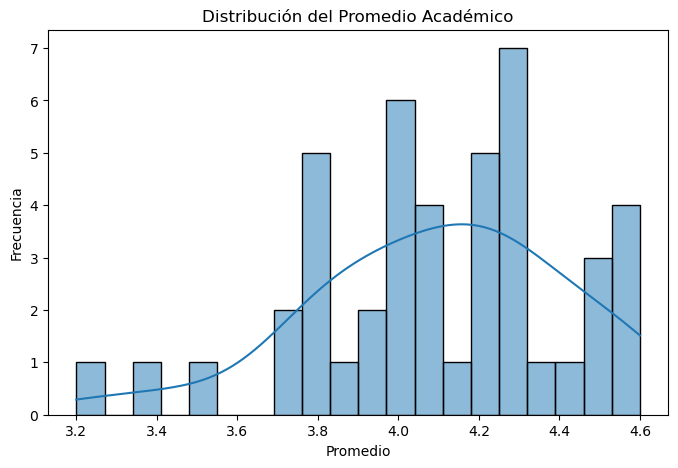

c:\Users\soler\anaconda3\envs\analitica\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.822e-04, tolerance: 3.717e-04
  model = cd_fast.enet_coordinate_descent(


🔹 Variables seleccionadas con Lasso: ['edad', 'semestre', 'horas_area', 'frecuencia_estudio', 'horas_estudio_semana', 'beca', 'facultad_Facultad de Comunicación', 'facultad_Facultad de Medicina', 'facultad_Facultad de Psicologia & Ciencias del Comportamiento', 'area_tiempo_libre_Biblioteca. Facultad. Ad portas', 'area_tiempo_libre_Biblioteca. Mesas del D. Sala de estudio', 'area_tiempo_libre_Cafe bolsa. Punto verde. Meson. Biblioteca. Ad portas. Arena Sabana. Canchas deportivas. Atelier', 'area_tiempo_libre_Embarcadero', 'area_tiempo_libre_Embarcadero. Cafe bolsa. Punto verde. Mesas del O', 'area_tiempo_libre_Embarcadero. Estudioteca. Punto verde', 'area_tiempo_libre_Embarcadero. Pasto', 'area_tiempo_libre_Embarcadero. Punto verde. Salón Desocupado', 'area_tiempo_libre_Estudioteca', 'area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde', 'area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde. Ad portas. Atelier. Sala de estudio', 'area_tiempo_libre_Estudioteca. Meson. Mesas del O. M

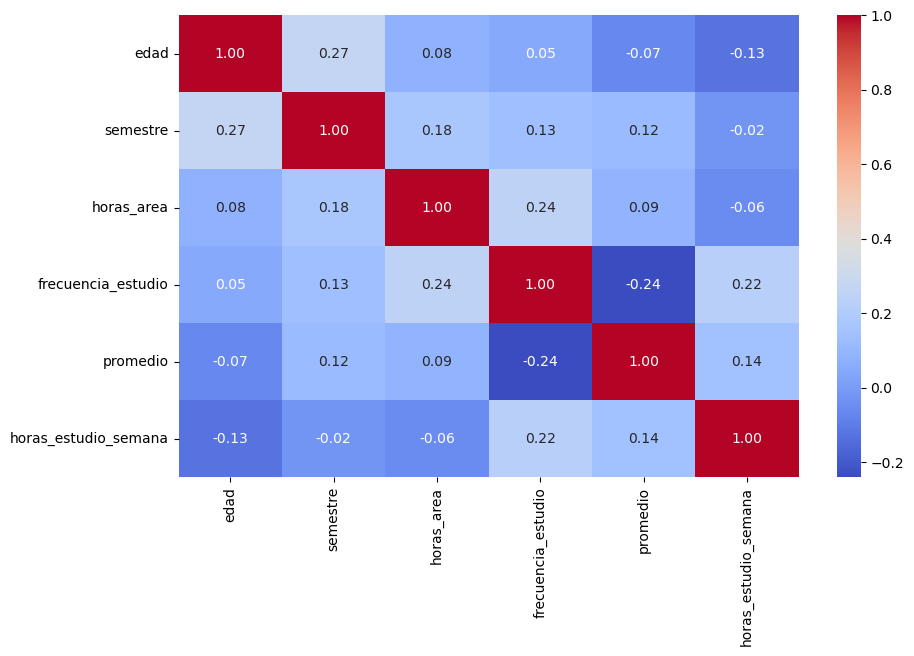

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['promedio'], bins=20, kde=True)
plt.title('Distribución del Promedio Académico')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre variables numéricas y el promedio
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Definir variables predictoras y variable objetivo
X = df.drop(columns=['timestamp', 'promedio'])
y = df['promedio']

# **Aplicar Lasso Regression para selección de variables con max_iter=5000**
lasso = LassoCV(cv=5, alphas=np.logspace(-4, 4, 50), max_iter=50000).fit(X, y)

# Seleccionar las variables más relevantes
selected_features = X.columns[lasso.coef_ != 0]
X = X[selected_features]

print(f'🔹 Variables seleccionadas con Lasso: {list(selected_features)}')

# ** Calcular R² usando toda la data con las variables seleccionadas**
model_full = LinearRegression()
model_full.fit(X, y)
r2_full = model_full.score(X, y)
print(f'🔹 R² usando toda la data (con Lasso): {r2_full:.4f}')


### Análisis R²

El valor de R² usando toda la data (con Lasso) es 0.9990. Esto indica que el modelo de regresión lineal con las variables seleccionadas por Lasso explica el 99.90% de la variabilidad en el promedio académico de los estudiantes. Un valor de R² tan alto sugiere que el modelo tiene un excelente ajuste a los datos.

## Fase 3.1: Evaluación del Overfitting


- Dividir los datos en entrenamiento y prueba (ej. 80%-20%).
- Evaluar el modelo en ambos conjuntos y calcular:
    - R² de entrenamiento.
    - R² de prueba.
    - Error cuadrático medio (MSE).


In [14]:
# **Dividir en conjuntos de entrenamiento (80%) y prueba (20%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# ** Construir modelo de regresión lineal**
model = LinearRegression()
model.fit(X_train, y_train)

# **Evaluar modelo**
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R² de entrenamiento: {r2_train:.4f}')
print(f'R² de prueba: {r2_test:.4f}')
print(f'MSE de prueba: {mse_test:.4f}')

# ** Aplicar Validación Cruzada (Cross-Validation) con 5 folds**
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# **Mostrar resultados de Cross-Validation**
print(f'R² en cada fold de Cross-Validation: {cv_scores}')
print(f'R² promedio en Cross-Validation: {cv_scores.mean():.4f}')

R² de entrenamiento: 0.9999
R² de prueba: 0.4193
MSE de prueba: 0.0521
R² en cada fold de Cross-Validation: [ 0.46381038 -0.02535072  0.77816392  0.00183553  0.51023468]
R² promedio en Cross-Validation: 0.3457


### Análisis de Resultados

- **R² de entrenamiento: 0.9999**: Este valor indica que el modelo explica el 99.99% de la variabilidad en los datos de entrenamiento, lo que sugiere un excelente ajuste a los datos de entrenamiento.

- **R² de prueba: 0.4193**: Este valor indica que el modelo explica el 41.93% de la variabilidad en los datos de prueba. La diferencia significativa entre R² de entrenamiento y R² de prueba sugiere que el modelo podría estar sobreajustado (overfitting) a los datos de entrenamiento.

- **MSE de prueba: 0.0521**: El Error Cuadrático Medio (MSE) en los datos de prueba es relativamente bajo, lo que indica que las predicciones del modelo están, en promedio, cerca de los valores reales.

- **R² en cada fold de Cross-Validation: [0.46381038, -0.02535072, 0.77816392, 0.00183553, 0.51023468]**: Los valores de R² en cada fold de la validación cruzada varían considerablemente, lo que sugiere que el modelo tiene un rendimiento inconsistente en diferentes subconjuntos de los datos.

- **R² promedio en Cross-Validation: 0.3457**: El valor promedio de R² en la validación cruzada es 0.3457, lo que indica que, en promedio, el modelo explica el 34.57% de la variabilidad en los datos. Este valor relativamente bajo refuerza la idea de que el modelo podría no generalizar bien a datos no vistos.

## Fase 2.2: Construcción del Modelo  (usando algunas de las variables)
#### Para entender mejor los datos y la relación entre las variables, se realizan los siguientes 

### Variables usadas:
- area_tiempo_libre_Terraza escuela. Mesas del D. Atelier
- area_tiempo_libre_Estudioteca
- area_tiempo_libre_Punto verde. Ad portas
- area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde
- area_tiempo_libre_Embarcadero. Cafe bolsa. Punto verde. Mesas del O
- lugar_estudio_Estudioteca. Mesas del D. Atelier
- facultad_Facultad de Comunicación
- trabajo_Sí
- modalidad_estudio_solo/a

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Cargar los datos
df1 = pd.read_csv(r"C:\Users\soler\Downloads\Formulario sin título (respuestas) - Respuestas de formulario 1.csv")

# Renombrar columnas para facilitar su manejo
df1.columns = ['timestamp', 'edad', 'facultad', 'semestre', 'area_tiempo_libre', 'horas_area', 
              'frecuencia_estudio', 'promedio', 'horas_estudio_semana', 'modalidad_estudio', 
              'lugar_estudio', 'beca', 'trabajo', 'actividades_extracurriculares']

# Limpiar valores que contienen caracteres no numéricos
df1 = df1.replace({'%': '', ',': '.'}, regex=True)

# Convertir columnas numéricas
num_cols = ['edad', 'semestre', 'horas_area', 'frecuencia_estudio', 'promedio', 'horas_estudio_semana']
df1[num_cols] = df1[num_cols].apply(pd.to_numeric, errors='coerce')

# Eliminar valores nulos
df1 = df1.dropna()

# Codificar variables categóricas
df1 = pd.get_dummies(df1, columns=['facultad', 'area_tiempo_libre', 'modalidad_estudio', 'lugar_estudio', 'trabajo'], drop_first=True)

# Seleccionar solo las 9 variables deseadas
selected_features = [
    'area_tiempo_libre_Terraza escuela. Mesas del D. Atelier',
    'area_tiempo_libre_Estudioteca',
    'area_tiempo_libre_Punto verde. Ad portas',
    'area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde',
    'area_tiempo_libre_Embarcadero. Cafe bolsa. Punto verde. Mesas del O',
    'lugar_estudio_Estudioteca. Mesas del D. Atelier',
    'facultad_Facultad de Comunicación',
    'trabajo_Sí',
    'modalidad_estudio_solo/a'
]
X = df1[selected_features]
y = df1['promedio']

# ** Calcular R² usando toda la data con las variables seleccionadas**
model_full = LinearRegression()
model_full.fit(X, y)
r2_full = model_full.score(X, y)
print(f'🔹 R² usando toda la data (con variables seleccionadas): {r2_full:.4f}')



🔹 R² usando toda la data (con variables seleccionadas): 0.6131


### Análisis: 
El valor de R² usando toda la data con las variables seleccionadas es 0.6131. Esto indica que el modelo de regresión lineal con las variables seleccionadas explica el 61.31% de la variabilidad en el promedio académico de los estudiantes. Aunque este valor es menor que el obtenido con todas las variables, sigue siendo un buen indicador de que las variables seleccionadas tienen una relación significativa con el rendimiento académico.


## Fase 3.2: Evaluación del Overfitting (con algunas de las variables usadas)


- Dividir los datos en entrenamiento y prueba (ej. 80%-20%).
- Evaluar el modelo en ambos conjuntos y calcular:
    - R² de entrenamiento.
    - R² de prueba.
    - Error cuadrático medio (MSE).



In [20]:
# **Dividir en conjuntos de entrenamiento (80%) y prueba (20%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# ** Construir modelo de regresión lineal**
model = LinearRegression()
model.fit(X_train, y_train)

# **Evaluar modelo**
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R² de entrenamiento: {r2_train:.4f}')
print(f'R² de prueba: {r2_test:.4f}')
print(f'MSE de prueba: {mse_test:.4f}')

# ** Aplicar Validación Cruzada (Cross-Validation) con 5 folds**
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# **Mostrar resultados de Cross-Validation**
print(f'R² en cada fold de Cross-Validation: {cv_scores}')
print(f'R² promedio en Cross-Validation: {cv_scores.mean():.4f}')

R² de entrenamiento: 0.5853
R² de prueba: 0.0277
MSE de prueba: 0.0872
R² en cada fold de Cross-Validation: [ 0.02081311  0.22608741  0.02206954 -0.00508598 -0.20980364]
R² promedio en Cross-Validation: 0.0108


### Análisis del Modelo

- **R² de entrenamiento: 0.5853**: Este valor indica que el modelo explica el 58.53% de la variabilidad en los datos de entrenamiento. Aunque es un valor moderado, sugiere que el modelo tiene un ajuste razonable a los datos de entrenamiento.

- **R² de prueba: 0.0277**: Este valor indica que el modelo explica solo el 2.77% de la variabilidad en los datos de prueba. La gran diferencia entre R² de entrenamiento y R² de prueba sugiere que el modelo está sobreajustado (overfitting) a los datos de entrenamiento y no generaliza bien a datos no vistos.

- **MSE de prueba: 0.0872**: El Error Cuadrático Medio (MSE) en los datos de prueba es relativamente bajo, lo que indica que las predicciones del modelo están, en promedio, cerca de los valores reales. Sin embargo, el bajo R² de prueba sugiere que el modelo no captura bien la variabilidad en los datos de prueba.

- **R² en cada fold de Cross-Validation: [0.0208, 0.2261, 0.0221, -0.0051, -0.2098]**: Los valores de R² en cada fold de la validación cruzada varían considerablemente, con algunos valores negativos, lo que sugiere que el modelo tiene un rendimiento inconsistente en diferentes subconjuntos de los datos.

- **R² promedio en Cross-Validation: 0.0108**: El valor promedio de R² en la validación cruzada es 0.0108, lo que indica que, en promedio, el modelo explica solo el 1.08% de la variabilidad en los datos. Este valor extremadamente bajo refuerza la idea de que el modelo no generaliza bien y tiene un rendimiento pobre en datos no vistos.

## Conclusiones:

### Recolección de Datos

La recopilación de datos fue un paso crucial en el taller, ya que proporcionó la base para el análisis y modelado estadístico. Se diseñó una encuesta en Google Forms en la que los estudiantes reportaron información relevante sobre su desempeño académico y las áreas donde suelen pasar más tiempo en la universidad. El cumplimiento de los criterios de calidad, como la recolección de más de 50 observaciones, aseguró la validez y confiabilidad de los datos.

#### Ventajas:

Permitió obtener información directa de los estudiantes, asegurando que las variables reflejen la realidad de su experiencia universitaria.

Se incluyeron diversas variables que podrían influir en el desempeño académico, permitiendo un análisis integral.

Se verificó la calidad de los datos recopilados, reduciendo el impacto de respuestas sesgadas o incompletas.

### Uso de Variables en el Modelo

Durante el análisis, se evaluaron distintas combinaciones de variables para construir un modelo de regresión lineal múltiple. Se comparó el uso de todas las variables disponibles con la selección de solo algunas, evaluando su impacto en la interpretabilidad y el rendimiento del modelo.

#### Ventajas de usar todas las variables:

Permitió capturar la mayor cantidad de factores posibles que podrían influir en el rendimiento académico.

Proporcionó un modelo inicial amplio que luego pudo ser refinado eliminando variables irrelevantes.

Permitía identificar correlaciones y posibles interacciones entre variables.

#### Ventajas de usar solo algunas variables:

Redujo la complejidad del modelo, facilitando su interpretación.

Disminuyó el riesgo de sobreajuste (overfitting), ya que menos variables reducían el ruido en los datos.

Mejoró la eficiencia del cálculo y la generalización del modelo a nuevos datos.

### Evaluación del Overfitting

Uno de los aspectos clave en el taller fue la evaluación del sobreajuste. Se realizaron pruebas con diferentes subconjuntos de datos para validar el modelo y determinar si se ajustaba demasiado a los datos de entrenamiento. Se aplicaron métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R^2) para comparar el desempeño del modelo en los datos de entrenamiento y prueba.

#### Conclusiones sobre el Overfitting:

El uso de todas las variables incrementaba el riesgo de sobreajuste, lo que podía llevar a predicciones poco confiables en nuevos datos.

La selección de un subconjunto de variables permitió mejorar la capacidad de generalización del modelo.

El balance entre complejidad y capacidad predictiva fue fundamental para obtener un modelo óptimo.

### Reflexiones Finales

El taller permitió comprender la importancia de una adecuada recolección y selección de datos, así como el impacto de la cantidad de variables en la interpretabilidad y rendimiento del modelo. Se demostró que la construcción de modelos predictivos efectivos requiere un equilibrio entre la cantidad de información utilizada y la capacidad del modelo para generalizar correctamente.

En futuras investigaciones, se podría considerar la recolección de una mayor cantidad de observaciones o la incorporación de nuevas variables para mejorar la precisión del análisis. Asimismo, el uso de métodos avanzados de selección de variables podría optimizar la eficiencia del modelo sin comprometer su capacidad predictiva.